In [1]:
# approach is from this website: 
# https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn
# BalancedRandomForestClassifier differs from SMOTE and ADASYN in that it is 
# not a resampling method, but rather a classifier in which the training employs 
# resampling internally. For more info, see Breinman et al., 
# Using Random Forest to Learn Imbalanced Data.

In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# os.getcwd()

In [4]:
# os.listdir(os.getcwd())

In [5]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_merged_reduced.csv")
all_param_df.shape


(31576, 357)

In [6]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [7]:
y_class

0        1
1        0
2        0
3        0
4        0
        ..
31571    0
31572    0
31573    0
31574    0
31575    0
Name: suc_class, Length: 31576, dtype: int64

In [8]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [9]:
x_data.shape

(31576, 346)

In [10]:
#label encode the developer name

In [11]:
x_data['developer']=x_data['developer'].astype('category')

In [12]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18189,Valve,999,90,602,5337,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18189,Valve,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18189,Valve,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18189,Valve,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6672,Valve,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#label encode the publisher name

In [14]:
x_data['publisher']=x_data['publisher'].astype('category')

In [15]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18189,15309,999,90,602,5337,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18189,15309,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18189,15309,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18189,15309,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6672,15309,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Instantiate the classifier

from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=200, random_state=0)

In [17]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, test_size=0.2, random_state=5)

In [18]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [20]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [21]:
# Instantiate and Train model
y = y_train
X = X_train_scaled

brf.fit(X, y)
y_pred = brf.predict(X_test_scaled)

In [22]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {brf.score(X, y)}")
print(f"Testing Data Score: {brf.score(X_test_scaled, y_test)}")

Training Data Score: 0.8568487727632621
Testing Data Score: 0.8516466117796073


In [23]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = brf.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      6145
           1       0.14      0.88      0.24       171

    accuracy                           0.85      6316
   macro avg       0.57      0.86      0.58      6316
weighted avg       0.97      0.85      0.90      6316



In [24]:
# thinking about baseline results:
# Support is not balanced - ~7700 of 1's and  160 0's
# Percision: for no success: 100%, better for successful games: 20%
# Percision= % of labeling an outcome that is correct from all the labels of that outcome
# labeled cancer correctly from all labeled cancer
# Recall: Fraction of positives found, 92% for 0, 92% for 1
# Recall - % of true label found from all true cases of the label
# how many of the cancer cases did you find
# f1 score: 92% due to overfitting on failure cases

<AxesSubplot:>

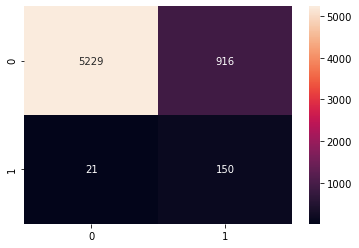

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = brf.predict(X_test_scaled)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [26]:
# Random Forests calculate feature importance
importances = brf.feature_importances_
importances

array([3.84407739e-02, 2.03599228e-02, 2.00980493e-02, 6.01287724e-02,
       2.01500648e-02, 2.90763428e-02, 4.79243942e-02, 3.47526912e-02,
       2.98459223e-04, 1.74113260e-04, 8.77173483e-03, 2.09907718e-02,
       8.37343746e-03, 4.50352015e-02, 1.58834448e-02, 1.61512665e-02,
       1.73672543e-02, 2.17368209e-03, 3.87742242e-03, 3.43407648e-05,
       2.36365792e-05, 1.33325525e-04, 6.48660770e-05, 6.83836936e-04,
       4.38518878e-05, 9.08146641e-06, 1.90215667e-04, 1.13371741e-03,
       3.52153353e-03, 1.03605974e-03, 3.05671931e-03, 7.61109322e-04,
       1.32230074e-03, 1.90959136e-03, 3.13482241e-04, 1.68302692e-04,
       1.95538314e-04, 1.71402113e-03, 1.07237263e-03, 8.92489593e-03,
       8.04873341e-03, 5.17650381e-03, 1.39032895e-03, 1.34948829e-03,
       4.78583058e-03, 8.47728813e-04, 2.14101277e-04, 1.51341243e-04,
       6.17387942e-04, 4.78291096e-05, 3.57690093e-03, 3.58404362e-03,
       2.50327133e-03, 4.82311022e-04, 8.86242363e-05, 2.45961481e-04,
      

In [27]:
# evaluate feature importance from X parameters
features_df = pd.DataFrame(zip(x_data.columns, brf.feature_importances_))
# sort by feature importance 
features_df = features_df.sort_values(by=[1], ascending=False)
# features_df



In [28]:
# drop all variables less than 0.02 feature importance
x_filtered_df = features_df[features_df[1]>=0.01]
x_filtered_df

,0,1
141,tagsingleplayer,0.063246
3,maxprice,0.060129
108,tagmultiplayer,0.059473
6,tagaction,0.047924
13,tagindie,0.045035
0,metascore,0.038441
7,tagadventure,0.034753
57,tagcoop,0.029575
5,tagstrategy,0.029076
62,tagopenworld,0.027016
